In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [2]:
sample_info = pd.read_table("../metadata/range_info.txt", header=None)
sample_info.columns = ["sample","condition","range","reads"]
sample_info.set_index(keys="sample",inplace=True)

In [3]:
sample_info

,condition,range,reads
sample,,,
AP_C_1,uninfected,native,reads_decontam/AP_C_1_clean.fq
AP_C_2,uninfected,native,reads_decontam/AP_C_2_clean.fq
AP_C_3,uninfected,native,reads_decontam/AP_C_3_clean.fq
AP_C_4,uninfected,native,reads_decontam/AP_C_4_clean.fq
AP_C_5,uninfected,native,reads_decontam/AP_C_5_clean.fq
...,...,...,...
SC_C_7,uninfected,invasive,reads_decontam/SC_C_7_clean.fq
SC_C_9,uninfected,invasive,reads_decontam/SC_C_9_clean.fq
SC_P_1,infected,invasive,reads_decontam/SC_P_1_clean.fq


In [4]:
contam_rates = pd.read_table("../outputs/blast2loxo/contam_rates.txt", header=None)
contam_rates.columns = ["sample","counts_total","counts_contam","contam_percent"]
contam_rates["sample"] = contam_rates["sample"].str.split(pat="/", expand=True)[1].str.split(pat=".",expand=True)[0]
contam_rates["site"] = contam_rates["sample"].str.split(pat="_", expand=True)[0]
contam_rates.set_index(keys="sample",inplace=True)
contam_rates

,counts_total,counts_contam,contam_percent,site
sample,,,,
AP_C_1,16120173,605547,0.037565,AP
AP_C_2,25009940,931673,0.037252,AP
AP_C_3,23002162,1277372,0.055533,AP
AP_C_4,30284350,1633315,0.053933,AP
AP_C_5,26817982,1449997,0.054068,AP
...,...,...,...,...
SC_C_7,19951702,966724,0.048453,SC
SC_C_9,20050370,768769,0.038342,SC
SC_P_1,24521556,3266357,0.133203,SC


In [5]:
merged = pd.merge(sample_info, contam_rates, left_index=True, right_index=True)
merged

,condition,range,reads,counts_total,counts_contam,contam_percent,site
sample,,,,,,,
AP_C_1,uninfected,native,reads_decontam/AP_C_1_clean.fq,16120173,605547,0.037565,AP
AP_C_2,uninfected,native,reads_decontam/AP_C_2_clean.fq,25009940,931673,0.037252,AP
AP_C_3,uninfected,native,reads_decontam/AP_C_3_clean.fq,23002162,1277372,0.055533,AP
AP_C_4,uninfected,native,reads_decontam/AP_C_4_clean.fq,30284350,1633315,0.053933,AP
AP_C_5,uninfected,native,reads_decontam/AP_C_5_clean.fq,26817982,1449997,0.054068,AP
...,...,...,...,...,...,...,...
SC_C_7,uninfected,invasive,reads_decontam/SC_C_7_clean.fq,19951702,966724,0.048453,SC
SC_C_9,uninfected,invasive,reads_decontam/SC_C_9_clean.fq,20050370,768769,0.038342,SC
SC_P_1,infected,invasive,reads_decontam/SC_P_1_clean.fq,24521556,3266357,0.133203,SC


In [6]:
rhithro_only = merged[merged["condition"]!="parasite"]

In [7]:
rhithro_only

,condition,range,reads,counts_total,counts_contam,contam_percent,site
sample,,,,,,,
AP_C_1,uninfected,native,reads_decontam/AP_C_1_clean.fq,16120173,605547,0.037565,AP
AP_C_2,uninfected,native,reads_decontam/AP_C_2_clean.fq,25009940,931673,0.037252,AP
AP_C_3,uninfected,native,reads_decontam/AP_C_3_clean.fq,23002162,1277372,0.055533,AP
AP_C_4,uninfected,native,reads_decontam/AP_C_4_clean.fq,30284350,1633315,0.053933,AP
AP_C_5,uninfected,native,reads_decontam/AP_C_5_clean.fq,26817982,1449997,0.054068,AP
...,...,...,...,...,...,...,...
SC_C_7,uninfected,invasive,reads_decontam/SC_C_7_clean.fq,19951702,966724,0.048453,SC
SC_C_9,uninfected,invasive,reads_decontam/SC_C_9_clean.fq,20050370,768769,0.038342,SC
SC_P_1,infected,invasive,reads_decontam/SC_P_1_clean.fq,24521556,3266357,0.133203,SC


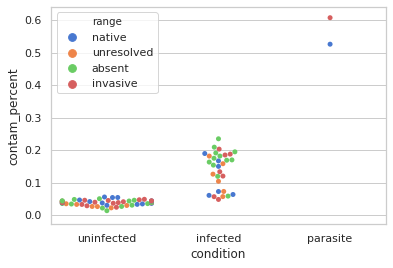

In [55]:
sns.set(style="whitegrid", palette="muted")
ax = sns.swarmplot(x="condition", y="contam_percent", hue="range", data=merged)

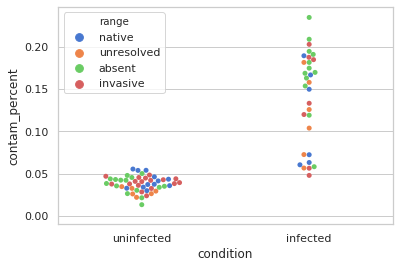

In [50]:
sns.set(style="whitegrid", palette="muted")
ax = sns.swarmplot(x="condition", y="contam_percent", hue="range", data=rhithro_only)


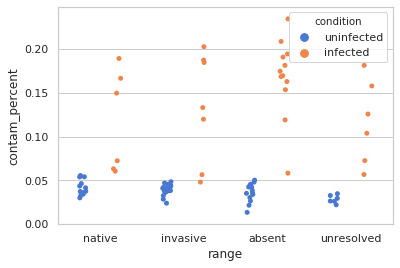

In [62]:
sns.set(style="whitegrid", palette="muted")
ax = sns.stripplot(x="range", y="contam_percent", hue="condition", order=["native","invasive","absent","unresolved"],dodge=True, data=rhithro_only)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

uninfected v.s. infected: Mann-Whitney-Wilcoxon test two-sided P_val=7.605e-14 U_stat=5.000e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x2aab35e55410>,
 [{'pvalue': 7.604746410656435e-14,
   'test_short_name': 'M.W.W.',
   'formatted_output': 'Mann-Whitney-Wilcoxon test two-sided P_val=7.605e-14 U_stat=5.000e+00',
   'box1': 'uninfected',
   'box2': 'infected'}])

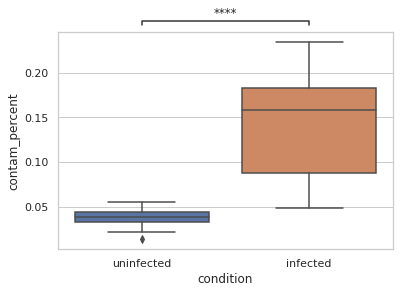

In [110]:
sns.set(style="dark ", color_codes=True)
order = ["uninfected","infected"]
ax = sns.boxplot(x="condition", y="contam_percent",
              data=rhithro_only, zorder=1)
add_stat_annotation(ax, data=rhithro_only, x="condition", y="contam_percent",
                    box_pairs=[("infected","uninfected")], test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

invasive_uninfected v.s. invasive_infected: t-test independent samples, P_val=2.648e-06 stat=-6.263e+00
native_uninfected v.s. native_infected: t-test independent samples, P_val=3.505e-04 stat=-4.518e+00
absent_uninfected v.s. absent_infected: t-test independent samples, P_val=4.362e-11 stat=-1.102e+01
unresolved_uninfected v.s. unresolved_infected: t-test independent samples, P_val=1.276e-03 stat=-4.429e+00
absent_infected v.s. unresolved_infected: t-test independent samples, P_val=3.916e-02 stat=2.246e+00
native_infected v.s. absent_infected: t-test independent samples, P_val=5.510e-02 stat=-2.069e+00


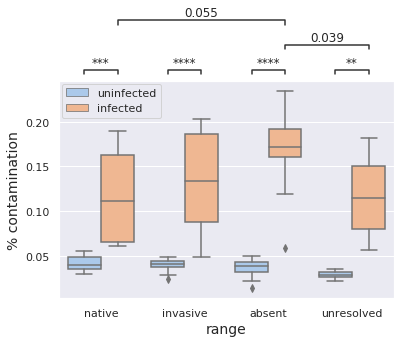

In [113]:
sns.set(style="darkgrid", palette="pastel", color_codes=True)
order = ["native","invasive","absent","unresolved"]
ax = sns.boxplot(x="range", y="contam_percent", hue="condition", order=order,
              data=rhithro_only, zorder=1)
ax.legend(bbox_to_anchor=(0.32, 1.013))
box_pairs = [
    (("native", "uninfected"), ("native", "infected")),
    (("invasive", "uninfected"), ("invasive", "infected")),
    (("absent", "uninfected"), ("absent", "infected")),
    (("unresolved", "uninfected"), ("unresolved", "infected")),
    (("unresolved", "infected"), ("absent", "infected")),
    (("native", "infected"), ("absent", "infected"))
    ]
add_stat_annotation(ax, data=rhithro_only, x="range", y="contam_percent", hue="condition", order=order,
                    box_pairs=box_pairs, test='t-test_ind', text_annot_custom=["***", "****", "****","**","0.039","0.055"], 
                    loc='outside', verbose=2)
plt.xlabel('range', fontsize=14)
plt.ylabel('% contamination', fontsize=14)
plt.savefig('../vis/contam_rates', dpi=300, bbox_inches='tight')